### 1. 使用jieba分词，得到文本中包含的词及词出现的次数 

In [1]:
import numpy as np
import math
import jieba

# 首先对文本进行处理，得到 my_paper.txt文件
#   包括去除标点符号、英文字符等

# encoding=utf-8
file = open('my_paper.txt')
all_the_text = file.read()


# 载入自定义字典，强调单词“地震动”
jieba.load_userdict("userdict.txt")

# 生成一个 list
words = jieba.lcut(all_the_text, cut_all=False)

import collections
# 生成一个字典，键是字，字是出现的次数
dic = collections.Counter(words)

# 出现的次数进行排序，频次：values
values = sorted(dic.values(),reverse=True)

# 将次数从高到低对应的键进行排序
keys = sorted(dic, key=dic.__getitem__, reverse=True)

Building prefix dict from the default dictionary ...
Loading model from cache c:\users\txy\appdata\local\temp\jieba.cache
Loading model cost 0.407 seconds.
Prefix dict has been built succesfully.


### 2.查看高频词

In [2]:
# 看一下出现频率高的都是什么词
# 根据结果调整一些词的词频
for i in range(30):
    print keys[i], values[i]

的 956
地震动 441
结构 385
持时 219
强度 194
和 165
在 160
为 136
参数 133
网壳 126
对 112
模型 109
地震 109
响应 108
与 98
研究 95
单层 90
中 87
分析 87
计算 85
了 84
损伤 81
时 81
作用 80
下 77
是 74
进行 72
频率 71
球面 70
动力 67


### 3.词序与词频关系可视化

In [3]:
# 统计一共有多少个词
length_of_words = len(keys)

In [4]:
# 次序编号 1-1838

# x(n)
x = np.arange(1, length_of_words+1)

# log_x(log_n)
log_x = np.zeros(length_of_words)
for i in range(length_of_words):
    log_x[i] = math.log(x[i])
    
# 次出现的频率：xd_values
sum_all = float(sum(values))
xd_values = np.zeros(length_of_words)
for i in range(length_of_words):
    xd_values[i] = values[i]/sum_all

# 频率的log值：log_xd_values
log_xd_values = np.zeros(length_of_words)
for i in range(length_of_words):
    log_xd_values[i] = math.log(xd_values[i])

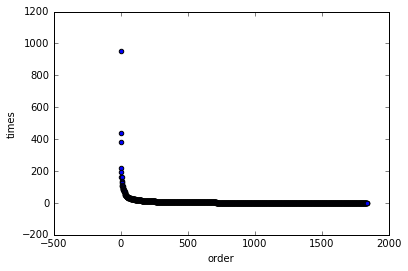

In [13]:
# 画图
# 序号 x 和 出现次数 values
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, values);
ax.set_xlabel('order');
ax.set_ylabel('times');

In [17]:
log_x = np.array(log_x)
log_xd_values = np.array(log_xd_values)

In [11]:
# 用log_x和log_xd_values做线性回归
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(log_x.reshape(len(log_x),1), log_xd_values.reshape(len(log_xd_values),1))
coef = model.coef_
intercept = model.intercept_
print '斜率是',coef
print '截距是',intercept

斜率是 [[-1.10453629]]
截距是 [-1.33838408]


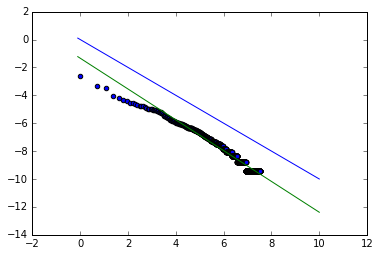

In [12]:
xx = np.linspace(-0.1,10,100)
yy = (xx*(coef) + intercept).reshape(100,1)
# log_x 和 log_xd_values 的散点图
# y = - x 的斜线
xx = np.linspace(-0.1,10,100)
fig, ax = plt.subplots()
ax.scatter(log_x, log_xd_values);
ax.plot(xx, xx*(-1));
ax.plot(xx, yy);

### 4.结论

由齐夫定律的内容可知，判定一个文本中词是否符合齐夫定律取决于其取对数后 词序与词频之间是否符合斜率为-1的线性关系。由上述分析结果可知，该分本分析的结果是-1.1045，基本满足齐夫定律。

### 5. 词数分析

- 基于全部出现于文本中的词的分析结果表明，线性回归斜率为-1.1045，与-1还有一定差距。
- 本节研究若取前 n 个高频单词进行分析，会不会得出什么不同的结果。

In [16]:
# 首先将上述过程做成函数
# n：只分析前n个高频单词
def words_num(n):
    log_xx = log_x[:n]
    log_xd_valuess = log_xd_values[:n]
    model = linear_model.LinearRegression()
    model.fit(log_xx.reshape(len(log_xx),1), log_xd_valuess.reshape(len(log_xd_valuess),1))
    coef = model.coef_
    intercept = model.intercept_
    return coef

In [55]:
coefs = np.zeros(length_of_words)
# 从 5 开始，计算词数量与斜率的关系
for i in range(5, length_of_words):
    coefs[i] = words_num(i)[0][0]

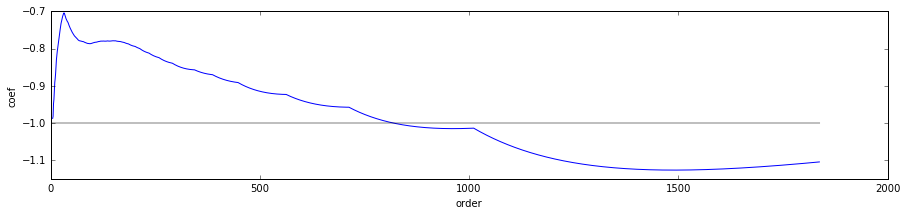

In [58]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x[4:-1], coefs[5:]);
ax.plot(x, np.zeros_like(x)-1, lw=0.5, color="black");
ax.set_xlabel('order');
ax.set_ylabel('coef');

In [60]:
print coefs[6:11]

[-0.98208972 -0.94810726 -0.93680532 -0.9134144  -0.89128274]


由上图可知，该文本对齐夫定律的满足程度随取得单词的数量的变化而变化。
- 当单词数很少时（5）个词，非常满足齐夫定律（斜率为-0.98），但是数量太少了（2-4个）也不行。
- 随着选取单词数量的增加，文本对齐夫定律的满足程度呈：“减弱——增强——减弱”的趋势，在单词数800附近又一次达到了完全满足定律的情况